## Scikit-learn Definition:

**Supervised learning**, in which the data comes with additional attributes that we want to predict. This problem can be either:

* **Classification**: samples belong to two or more *classes* and we want to learn from already labeled data how to predict the class of unlabeled data. An example of classification problem would be the handwritten digit recognition example, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.


* **Regression**: if the desired output consists of one or more *continuous variables*, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

MNIST dataset - a set of 70,000 small images of digits handwritten   
[The MNIST Database](http://yann.lecun.com/exdb/mnist/)

***

## Downloading the MNIST dataset

In [1]:
import numpy as np
import sklearn
sklearn.__version__

'0.21.3'

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name="mnist_784")
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [3]:
len(mnist['data'])

70000

## Visualization

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
X.shape

(70000, 784)

In [7]:
28*28

784

In [8]:
y # dtype = object (string)

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [9]:
y = y.astype("float")

In [10]:
X[69999]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   8., 117., 254., 220.,
        89.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        13.,  95., 212., 253., 253., 253., 157.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,  16.,  95., 209., 253., 253., 253., 245.,
       125.,  18.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [11]:
y[69999]

6.0

In [12]:
y.shape

(70000,)

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
def viz(n):
    plt.imshow(X[n].reshape(28,28))
    return

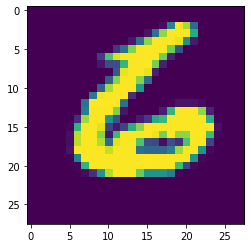

In [14]:
viz(69999)

In [15]:
y[1000]

0.0

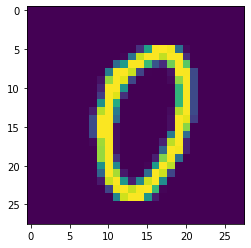

In [16]:
viz(1000)

### Exercise: Locating the number 4 and plot the image

In [17]:
type(y)

numpy.ndarray

In [18]:
y == 4

array([False, False,  True, ...,  True, False, False])

In [19]:
np.where(y==4)

(array([    2,     9,    20, ..., 69977, 69987, 69997], dtype=int64),)

In [20]:
y[69977]

4.0

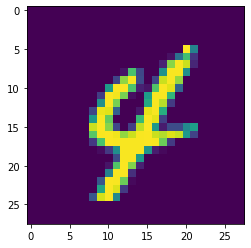

In [21]:
_ = X[69977]
_image = _.reshape(28,28)
plt.imshow(_image)

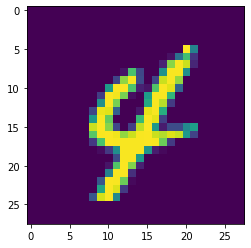

In [22]:
viz(69977)

## Splitting the train and test sets

### Method #1

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

### Method #2

In [25]:
num_split = 60000
X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]

Now the training set from Method #2 is not shuffled, we need to do that to make sure that training set is randomised and the data distribution is consistent (shuffling is bad idea for time series data)

## Shuffling the dataset

[Alternative Method](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html)

In [26]:
import numpy as np

In [27]:
shuffle_index =  np.random.permutation(num_split)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### Training a Binary Classifier

To simplify a problem, let's do "zero"/"non-zero", making it a two-class problem.

First to convert the target to 0 or non-zero

In [28]:
y_train_0 = (y_train == 0)

In [29]:
y_train_0

array([False, False, False, ..., False, False, False])

In [30]:
y_test_0 = (y_test == 0)

In [31]:
y_test_0

array([False, False, False, ..., False, False, False])

At this point it's possile to pick any classifier and train it. This is the iterative part of choosing and testing all the classifiers and tuning the hyper parameters

***

## SGDClassifier
[SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) Linear classifiers (SVM, logistic regression) with SGD training.

## Training

In [32]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state=0)
clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

## Prediction

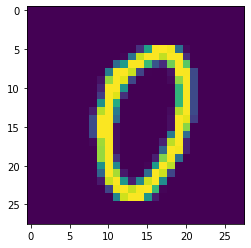

In [33]:
viz(1000)

In [34]:
clf.predict(X[1000].reshape(1,-1))

array([ True])

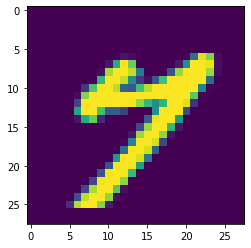

In [35]:
viz(1001)

In [36]:
clf.predict(X[1001].reshape(1,-1))

array([False])

***

## Performance Measures

## Measuring Accuracy Using Cross-Validation

### StratifiedKFold

Let's try with the `StratifiedKFold` stratified sampling to create multiple folds. At each iteration, the classifier was cloned and trained using the training folds and makes predictions on the test fold. 

StratifiedKFold utilised the Stratified sampling concept

* The population is divided into homogeneous subgroups called strata
* The right number of instances is sampled from each stratum 
* To guarantee that the test set is representative of the population

In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = SGDClassifier(random_state=0)

In [39]:
skfolds = StratifiedKFold(n_splits=3, random_state=100)

In [42]:
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(clf)
    X_train_fold = X_train[train_index]
    y_train_fold = (y_train_0[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_clf.fit(X_train_fold, y_train_fold)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct / len(y_pred)))

0.9836
0.9881
0.9776


#### `cross_val_score` using K-fold Cross-Validation

K-fold cross-validation splits the training set into K-folds and then make predictions and evaluate them on each fold using a model trained on the remaning folds.

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
cross_val_score(clf, X_train, y_train_0, cv=3, scoring='accuracy')

array([0.98355082, 0.9881    , 0.97759888])

#### Exercise:

Performing 10-fold CV test

In [47]:
cross_val_score(clf, X_train, y_train_0, cv=10, scoring='accuracy')

array([0.98700217, 0.98783536, 0.98316947, 0.98733333, 0.98716667,
       0.98433333, 0.98633333, 0.98099683, 0.98816469, 0.99016503])

***

## Danger of Blindly Applying Evaluator As a Performance Measure

Let's check against a dumb classifier

In [55]:
1 - sum(y_train_0) / len(y_train_0)

0.9012833333333333

A simple check shows that 90.1% of the images are not zero. Any time you guess the image is not zero, you will be right 90.13% of the time. 

Bare this in mind when you are dealing with **skewed datasets**. Because of this, accuracy is generally not the preferred performance measure for classifiers.

# Confusion Matrix

In [57]:
from sklearn.model_selection import cross_val_predict

In [58]:
y_train_pred = cross_val_predict(clf, X_train, y_train_0, cv=3)

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(y_train_0, y_train_pred)

array([[53269,   808],
       [  207,  5716]], dtype=int64)

<img src='img//classification_confusion_matrix.jpg' width=50%>

In [66]:
import pandas as pd
pd.DataFrame(confusion_matrix(y_train_0, y_train_pred),
            columns=pd.MultiIndex.from_product([['Prediction'], ['Negative', 'Positive']]),
            index=pd.MultiIndex.from_product([['Actual'], ['Negative', 'Positive']]))

Prediction         
                  Negative Positive
Actual Negative      53269      808
       Positive        207     5716

# Precision

**Precision** measures the accuracy of positive predictions. Also called the `precision` of the classifier

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

<img src='img//classification_precision.jpg' width=50%>

In [67]:
from sklearn.metrics import precision_score, recall_score

Note the result here may vary from the video as the results from the confusion matrix are different each time you run it.

In [68]:
precision_score(y_train_0, y_train_pred) # 5618 / (574 + 5618)

0.8761496014714899

In [69]:
5618 / (574 + 5618)

0.9072997416020672

## Recall

`Precision` is typically used with `recall` (`Sensitivity` or `True Positive Rate`). The ratio of positive instances that are correctly detected by the classifier.

$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$

<img src='img//classification_recall.jpg' width=50%>

Note the result here may vary from the video as the results from the confusion matrix are different each time you run it.

In [70]:
recall_score(y_train_0, y_train_pred) # 5618 / (305 + 5618)

0.965051494175249

In [71]:
5618 / (305 + 5618)

0.9485058247509708

## F1 Score

$F_1$ score is the harmonic mean of precision and recall. Regular mean gives equal weight to all values. Harmonic mean gives more weight to low values.


$$F_1=\frac{2}{\frac{1}{\textrm{precision}}+\frac{1}{\textrm{recall}}}=2\times \frac{\textrm{precision}\times \textrm{recall}}{\textrm{precision}+ \textrm{recall}}=\frac{TP}{TP+\frac{FN+FP}{2}}$$

The $F_1$ score favours classifiers that have similar precision and recall.


In [72]:
from sklearn.metrics import f1_score

Note the result here may vary from the video as the results from the confusion matrix are different each time you run it.

In [73]:
f1_score(y_train_0, y_train_pred)

0.918454246003053

***

# To be continued...